# Assumptions

- every 3rd segment is a searching segment
- we have timeseries as data, i.e the lowest id is the first datum and the highest id the last
- there are 8 components per run

# Import

In [1]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

## Notebook display settings
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_seq_items = None

# Own scripts
from functions import get_start_end_points, plot_data, mean_between_neighbors, generate_histogram2d, build_spiral, direction, turn
## Plot style
%matplotlib inline

# Data

In [2]:
with open('data.pickle', 'rb') as handle:
    data = pickle.load(handle)
data.head()

,id,run,timestamp,segment,start_time,end_time,force_x,force_y,force_z,pos_x,pos_y,pos_z,rot_x,rot_y,rot_z,result_robot
0,163.0,0.0,2017-05-30 09:21:13.150,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.543045,-2.924596,-7.257000,-257.695704,-265.980105,240.007357,-0.008832,0.034723,179.958414,Success
1,164.0,0.0,2017-05-30 09:21:13.200,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.465969,-3.278856,-7.522000,-257.617629,-265.999590,240.004745,-0.000171,0.019928,179.968161,Success
2,165.0,0.0,2017-05-30 09:21:13.250,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.317475,-3.435834,-7.705999,-256.626803,-266.602650,239.791224,-179.993978,179.989304,0.164766,Success
3,166.0,0.0,2017-05-30 09:21:13.300,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.298383,-3.457754,-7.580999,-254.594017,-267.926090,239.323013,-179.992478,179.999036,0.577883,Success
4,167.0,0.0,2017-05-30 09:21:13.350,11.0,2017-05-30 09:21:05,2017-05-30 09:22:41.607,-0.289898,-3.447854,-7.539000,-251.411919,-269.894497,238.550625,-179.996649,179.988091,1.210269,Success


# Code

## Lists

Find the starting and end points for the searching segments.

In [3]:
start_points, end_points, rel_end_points = get_start_end_points(data)

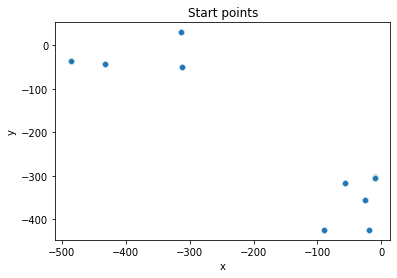

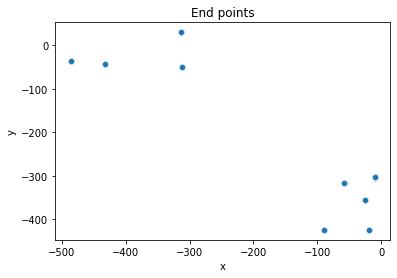

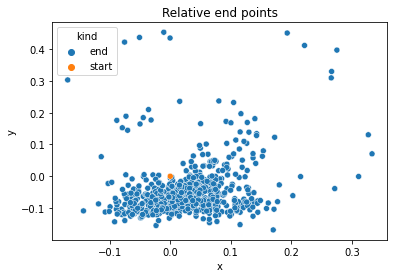

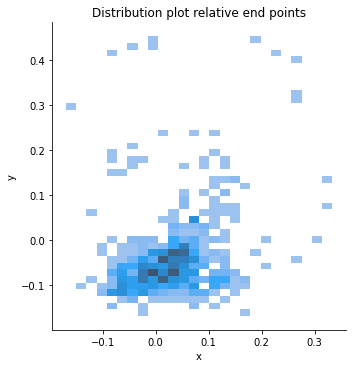

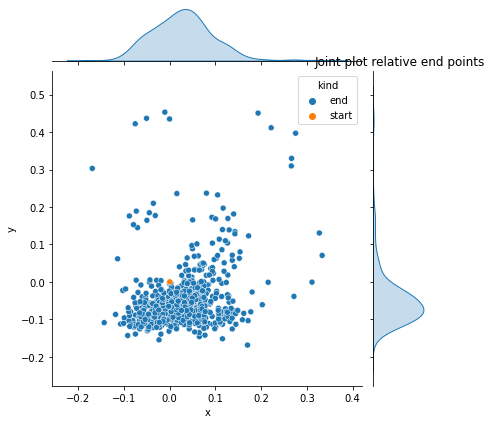

In [4]:
plot_data(start_points, end_points, rel_end_points)

In [5]:
hist, xedge, yedge = generate_histogram2d(rel_end_points)

<AxesSubplot:>

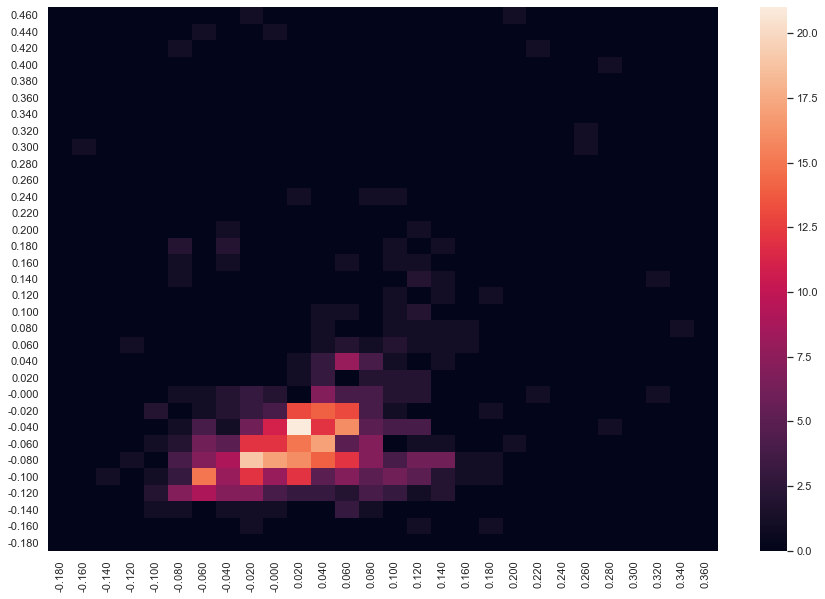

In [6]:
sns.set(rc={'figure.figsize': (15,10)})
sns.heatmap(np.flipud(np.swapaxes(hist,0,1)), xticklabels=mean_between_neighbors(xedge), yticklabels=np.flipud(mean_between_neighbors(yedge)))
#plt.axis("equal")
#plt.show()

In [7]:
res = build_spiral(10,7,2,3,direction.N,turn.turn_left)
print(res)
print()
print(np.flipud(np.swapaxes(res, 0, 1)))

[[ 37  16  15  14  13  12  29]
 [ 38  17   4   3   2  11  28]
 [ 39  18   5   0   1  10  27]
 [ 40  19   6   7   8   9  26]
 [ 41  20  21  22  23  24  25]
 [ 42  43  44  45  46  47  48]
 [ 73  74  75  76  77  78  79]
 [112 113 114 115 116 117 118]
 [159 160 161 162 163 164 165]
 [214 215 216 217 218 219 220]]

[[ 29  28  27  26  25  48  79 118 165 220]
 [ 12  11  10   9  24  47  78 117 164 219]
 [ 13   2   1   8  23  46  77 116 163 218]
 [ 14   3   0   7  22  45  76 115 162 217]
 [ 15   4   5   6  21  44  75 114 161 216]
 [ 16  17  18  19  20  43  74 113 160 215]
 [ 37  38  39  40  41  42  73 112 159 214]]


In [8]:
spirals = []

size_x, size_y = hist.shape

start_x = (np.abs(xedge)).argmin()
start_y = (np.abs(yedge)).argmin()

for d in direction:
    for t in turn:
        sp = build_spiral(size_x, size_y, start_x, start_y, d, t)
        # print(sp[start_x - 3: start_x + 4, start_y - 3: start_y + 4])
        # print()
        spirals.append((sp, d, t))

## Definitions

- North and East are the positive directions of the x or y axis
- South and West are the negative directions of the x or y axis
- The x axis is displayed here from negativ values (left) to positiv values (right)
- The y axis is displayed here from negative values (bottom) to positiv values (top)

In [9]:
res = (np.inf, None, None, None)

for sp, d, t in spirals:
    sp_sum = np.sum(np.multiply(sp, hist))
    print(str(d) + " " + str(t) + ": " + str(sp_sum) + "\n")
    if res [0] > sp_sum:
        res = (sp_sum, d, t, sp)

print("Best result: ")
print(str(res[1]) + " " + str(res[2]))
print(res[0])
print(np.flipud(np.swapaxes(res[3][start_x - 2: start_x + 3, start_y - 2: start_y + 3], 0, 1)))

direction.S turn.turn_left: 73202.0

direction.S turn.turn_right: 80430.0

direction.N turn.turn_left: 81394.0

direction.N turn.turn_right: 74934.0

direction.W turn.turn_left: 84298.0

direction.W turn.turn_right: 85798.0

direction.E turn.turn_left: 78082.0

direction.E turn.turn_right: 77254.0

Best result: 
direction.S turn.turn_left
73202.0
[[20 19 18 17 16]
 [21  6  5  4 15]
 [22  7  0  3 14]
 [23  8  1  2 13]
 [24  9 10 11 12]]
